In [1]:
import time, requests, datetime, traceback, io, json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydocmaker as pyd

In [2]:
t_script_start = datetime.datetime.utcnow()
t_script_start

datetime.datetime(2024, 9, 12, 20, 18, 32, 347531)

___
# EXAMPLE FUNCTIONAL TEST USING THE CLIENT LIBRARY
___


This is an example on how one could run a functional test


In [3]:
# NOTE: The string or node provided for parameters must be self contained and only consist of the following Python literal structures: 
# strings, bytes, numbers, tuples, lists, dicts, sets, booleans, and None

## PARAMS

### Parameters (Which will be set by the backend automatically)

In [4]:
# These are the auto generated Parameters, which will be set by the scriptrunner
path_to_libs = ''
script_id = 0
dbserver_uri = "http://localhost:8000"
url = "http://localhost:8000"
device_id = ''

script_name = "02_example_functional_test"
script_version = "dirty_wip"
script_in_path = ""
script_out_path = ""
default_data_dir = ""

start_condition = "2024-09-05T15:52:03.463362Z"
end_condition = "2024-09-06T15:52:03.463362Z"
time_initiated = "2024-09-05T15:52:03.463362Z"
time_started = "2024-09-05T15:52:03.463362Z"
time_finished = "2024-09-05T15:52:03.463362Z"
status = "STARTING"
errors = ""
comments = ""
docs_json = {}
papermill_json = None
data_json = {}
last_time_changed = "2024-09-05T15:52:24.066754Z"
device = []
datafiles = []

follow_up_script = {"script_in_path": "", "script_params_json": {}}


### Parameters

In [5]:
# manual parameters
do_upload = 0
add_test_info_to_rep = 1
fail_on_failed_test = 0


startup_routine =  [
    'wait 2s'
]

tests = {
    'dummy_testcase': [
        
        {"fun": "time.sleep(1)"},
        {"fun": "lambda: 'ON'", "expected": "'ON'", "abort_on_fail": True},
        {"fun": "random.randint(0, 10)", "expected": "<5", "abort_on_fail": False},
        {"fun": "time.sleep(1)"},
        {"fun": "get_user_feedback('Please Check Device firmware version and configuration settings.')", "expected": "success", "abort_on_fail": False},
        {"fun": "random.randint(-5, 5)", "expected": "-4 < act < 10", "abort_on_fail": False},
        'plot_beam()',
    ]
}

teardown_routine = [
    'wait 2s'
]


## Preparation

## Initialize the client library

In [6]:

import sys, os
sys.path.insert(0, r"C:\Users\tglaubach\repos\jupyter-script-runner\src")

import JupyRunner.client as client
from JupyRunner.core import helpers
helpers.log.setLevel('INFO')

In [7]:
api = client.ServerApi(url)
# api.ping()

## Minimal Testcase using a scriptrunner

--------------------dummy_testcase -----------------------------------------------------------------
dummy_testcase --> RUNNING...
dummy_testcase --> OK
----------------------------------------------------------------------------------------------------
Testcase:dummy_testcase:actions_3: FAIL: Check for "act <5" with act=7 failed (from func='random.randint(0, 10)')
Testcase:dummy_testcase:actions_6: FAIL: Check for "-4 < act < 10" with act=-4 failed (from func='random.randint(-5, 5)')

----------------------------------------------------------------------------------------------------
FINISHED!
TESTED N=1 testcases between 2024-09-12 20:18:32.402273...2024-09-12 20:18:42.662152 (0:00:10.259879)
RESULTS:
------------------------------------------------------------
TESTCASE No.    0 | dummy_testcase                      |>  --> FAIL!


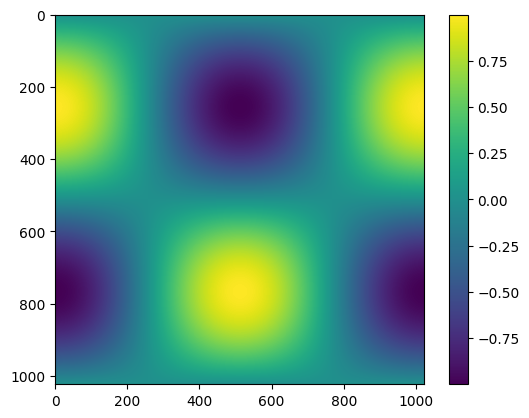

In [8]:
import random

# this is the real path but for the purpose of this test we are going to mock this
# api.get_user_feedback(msg)

def get_user_feedback(msg, *args, **kwargs):
    # function to mock a user feedback
    feedback = {'request': msg, 'response': f"dummy response at {datetime.datetime.utcnow().isoformat()}", 'success': True, "error": ""}
    return feedback


def plot_beam(*args, **kwargs):
    import matplotlib.pyplot as plt
    import numpy as np

    t = np.linspace(0, 2 * np.pi, 1024)
    data2d = np.sin(t)[:, np.newaxis] * np.cos(t)[np.newaxis, :]

    fig, ax = plt.subplots()
    im = ax.imshow(data2d)
    fig.colorbar(im, ax=ax)
    doc = pyd.DocBuilder()
    doc.add_fig(fig, caption='This is just an example plot!')
    return doc

runner = client.TestRunner.construct(tests, 
                                     on_setup = startup_routine, 
                                     on_teardown = teardown_routine, 
                                     globals_dc = globals(), 
                                     locals_dc=locals())

runner.run()

runner.pprint()



### Show the Results from the Minimal Test


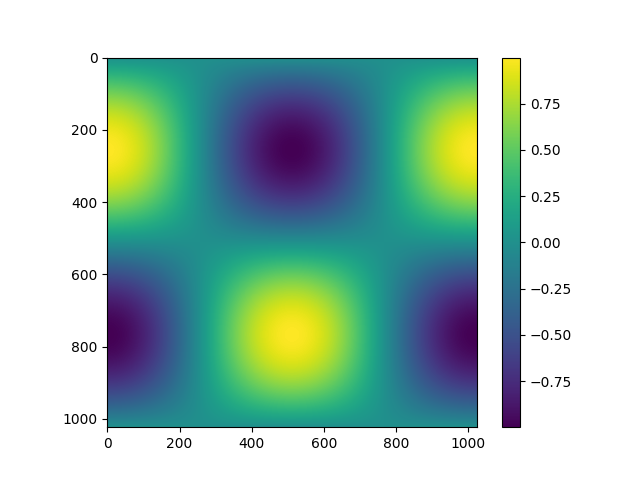

In [9]:
doc = runner.to_doc()
doc.show()

### Upload to Server as Report / Document

In [10]:
# this is how to upload to a server
if do_upload:
    res = api.upload_doc(doc, 'Example_Testrun_1', script_id)
    print(res)
else:
    print('SKIPPING UPLOAD!!!\n'*10)

SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!



### Upload the datafiles to Server

In [11]:
files = runner.get_files_to_upload()
len(files), files.keys()

(0, dict_keys([]))

In [12]:
if do_upload and script_id:
    res = api.upload_files(script_id, files)
    print(res)
else:
    print('SKIPPING UPLOAD!!!\n'*10)

SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!
SKIPPING UPLOAD!!!



# RESULTS INFO

In [13]:
runner.pprint()

FINISHED!
TESTED N=1 testcases between 2024-09-12 20:18:32.402273...2024-09-12 20:18:42.662152 (0:00:10.259879)
RESULTS:
------------------------------------------------------------
TESTCASE No.    0 | dummy_testcase                      |>  --> FAIL!


In [14]:
if fail_on_failed_test:
    errs = runner.get_errors()
    failed_tests = [r.name for r in runner.testcases]
    assert not failed_tests, f'{failed_tests=} \n\n{errs}'